In [71]:
import data_exploration_final as de
import algorithm_pipeline as ap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from __future__ import division
import numpy as np
from sklearn import preprocessing, svm, metrics, tree, decomposition, svm, model_selection
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import pylab as pl
from scipy import optimize
import importlib
importlib.reload(de)
importlib.reload(ap)

<module 'algorithm_pipeline' from '/Users/mariomoreno/Desktop/Grad School/Machine Learning/Homeworks/HW4/algorithm_pipeline.py'>

# 1) Load and Split the Data

In [2]:
unclean_outcomes = de.read_data('outcomes.csv', 0)

In [3]:
unclean_projects = de.read_data('projects.csv', 0)

In [4]:
unclean_outcomes.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


Outcomes includes our label. In order to protect from leaking data from the future into my dataset, I will drop the other variables for this dataframe because these are things I would only know once my project has been funded. I wouldn't know this information at time of prediciton.

In [5]:
unclean_outcomes = unclean_outcomes.loc[:,['projectid','fully_funded']]
unclean_outcomes.head()

,projectid,fully_funded
0,ffffc4f85b60efc5b52347df489d0238,f
1,ffffac55ee02a49d1abc87ba6fc61135,t
2,ffff97ed93720407d70a2787475932b0,t
3,ffff418bb42fad24347527ad96100f81,f
4,ffff2d9c769c8fb5335e949c615425eb,t


In [6]:
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [7]:
unclean_projects['date_posted'] = pd.to_datetime(unclean_projects['date_posted'])
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


Make sure that our date variables are in date time format so we can cut this by date.

In [8]:
new_unclean_projects = (unclean_projects['date_posted'] > '2011-01-01') & (unclean_projects['date_posted'] <= '2013-12-31')

In [9]:
unclean_projects = unclean_projects.loc[new_unclean_projects]

In [10]:
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
44772,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,Other,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31
44773,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,Supplies,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31
44774,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,Technology,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31
44775,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31
44776,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,Supplies,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31


We've identified the projects that occur within the specified dates, now we need to join them with outcomes on projectid. 

In [11]:
merged = pd.merge(unclean_projects, unclean_outcomes, on = 'projectid')
merged.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,fully_funded
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31,t
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31,f
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31,f
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31,f
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31,t



Summary stats for projectid
count                               352790
unique                              352790
top       b62c9c33c78eb67f6276e848e272b424
freq                                     1
Name: projectid, dtype: object


Summary stats for teacher_acctid
count                               352790
unique                              157056
top       214acf23d183dfa2f1dc16e7b3658320
freq                                   174
Name: teacher_acctid, dtype: object


Summary stats for schoolid
count                               352790
unique                               44808
top       9943fdb43ab5f2b53f27e961caf9e90a
freq                                   476
Name: schoolid, dtype: object


Summary stats for school_ncesid
count    3.279590e+05
mean     2.502985e+11
std      1.648287e+11
min      1.000050e+10
25%      6.372001e+10
50%      2.400090e+11
75%      3.904440e+11
max      6.100008e+11
Name: school_ncesid, dtype: float64


Summary stats for school_latitude
count    352

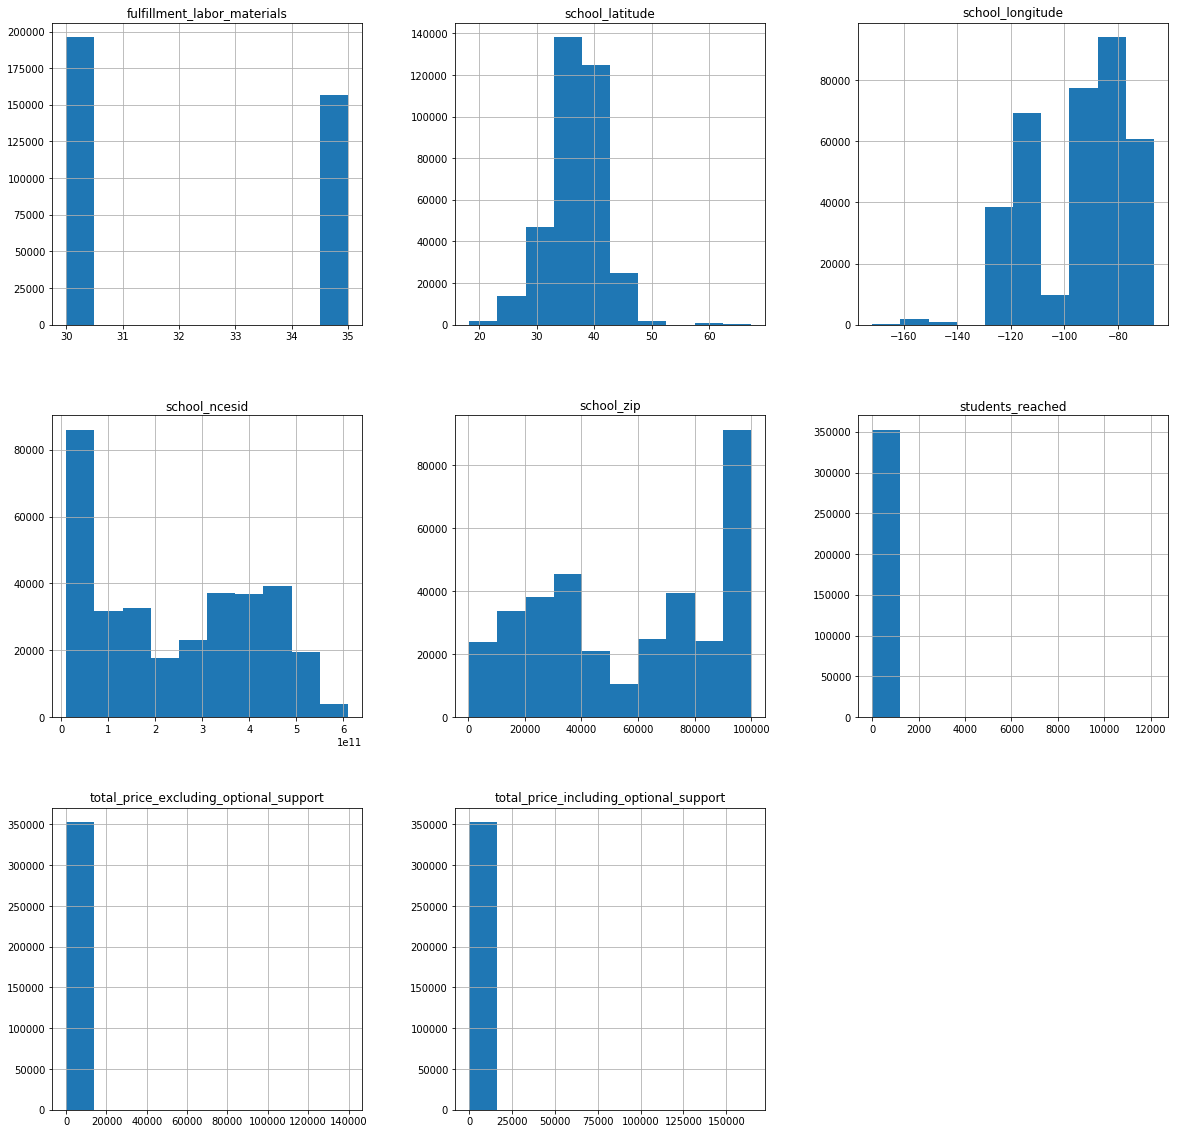

In [12]:
de.explore_data(merged)

Before splitting my data, I'll need to fill nulls, create a whole range of dummies for variables that aren't currently integers, and do some light cleaning of the data. Some thoughts:

- All features with True or False as variables need to be turned into 1 or 0. Those include: eligible_almost_home_match, eligible_double_your_impact_match, teacher_ny_teaching_fellow, teacher_teach_for_america, school_charter_ready_promise, school_kipp, school_nlns, school_year_round, and school_charter. 
- There are several features here that I might need to control for: I'll get rid of city, county, and school district in favor of zip code and metro information. I also no longer need projectid, schoolid, or other classifiers that are randomly assigned and unique to each school or project. I'll get rid of them.
- For features with values that aren't integers, there is a need to dummify those features across multiple columns. 
- Will look for outliers in students reached and total price variables

In [13]:
de.remove_outliers(merged, 'students_reached')

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,fully_funded
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31,t
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31,f
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31,f
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31,f
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31,t
5,c685c844476d7ed75bf87699eeafd682,4b19500fb087a635c98061505f1e6c6f,34c650f9f6d5c3e42b8e2169c280ecb7,NaN,34.193630,-79.769058,Florence,SC,29501.0,urban,...,high poverty,Grades PreK-2,30.0,688.11,809.54,22.0,f,f,2013-12-31,f
6,a4b234feb2b72921ed59850d5c873d62,620982375045fa11d872702f26ab98bb,da1985df161ba5c3842fc99579b6e4b1,2.102990e+11,38.249919,-85.722310,Louisville,KY,40206.0,urban,...,highest poverty,Grades PreK-2,30.0,935.16,1100.19,25.0,t,f,2013-12-31,f
7,0ff5dec32bf793243a8b0b2c023a81f0,ec5b110df87bd511b508961676d08b6c,72e2b0cb2eecfdc37e67e0eaf10da07b,1.201980e+11,30.507978,-86.132003,Freeport,FL,32439.0,rural,...,highest poverty,Grades PreK-2,30.0,809.32,952.14,17.0,f,f,2013-12-31,t
8,8cdbc04c8ee2ae6afed4951727488579,697e3ea37463219c27f9652b2287c844,5ad205c4692c53cd0f5fcdfca2322a86,1.201440e+11,28.546640,-81.388606,Orlando,FL,32801.0,urban,...,highest poverty,Grades PreK-2,30.0,315.01,370.60,20.0,f,f,2013-12-31,t
9,72d58b8e22adbe6e6aab65d8b2ab4973,0793851e2f40ecc28e40513622aea670,a180e99ef60be5a9c5f96e21f9868f13,5.606090e+11,44.097156,-104.622147,Upton,WY,82730.0,rural,...,moderate poverty,Grades PreK-2,30.0,297.85,350.41,21.0,f,f,2013-12-31,t


In [14]:
de.remove_outliers(merged, 'total_price_excluding_optional_support')

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,fully_funded
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31,t
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31,f
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31,f
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31,f
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31,t
5,c685c844476d7ed75bf87699eeafd682,4b19500fb087a635c98061505f1e6c6f,34c650f9f6d5c3e42b8e2169c280ecb7,NaN,34.193630,-79.769058,Florence,SC,29501.0,urban,...,high poverty,Grades PreK-2,30.0,688.11,809.54,22.0,f,f,2013-12-31,f
6,a4b234feb2b72921ed59850d5c873d62,620982375045fa11d872702f26ab98bb,da1985df161ba5c3842fc99579b6e4b1,2.102990e+11,38.249919,-85.722310,Louisville,KY,40206.0,urban,...,highest poverty,Grades PreK-2,30.0,935.16,1100.19,25.0,t,f,2013-12-31,f
7,0ff5dec32bf793243a8b0b2c023a81f0,ec5b110df87bd511b508961676d08b6c,72e2b0cb2eecfdc37e67e0eaf10da07b,1.201980e+11,30.507978,-86.132003,Freeport,FL,32439.0,rural,...,highest poverty,Grades PreK-2,30.0,809.32,952.14,17.0,f,f,2013-12-31,t
8,8cdbc04c8ee2ae6afed4951727488579,697e3ea37463219c27f9652b2287c844,5ad205c4692c53cd0f5fcdfca2322a86,1.201440e+11,28.546640,-81.388606,Orlando,FL,32801.0,urban,...,highest poverty,Grades PreK-2,30.0,315.01,370.60,20.0,f,f,2013-12-31,t
9,72d58b8e22adbe6e6aab65d8b2ab4973,0793851e2f40ecc28e40513622aea670,a180e99ef60be5a9c5f96e21f9868f13,5.606090e+11,44.097156,-104.622147,Upton,WY,82730.0,rural,...,moderate poverty,Grades PreK-2,30.0,297.85,350.41,21.0,f,f,2013-12-31,t


In [15]:
merged = merged[((merged['students_reached'] - merged['students_reached'].mean()) / merged['students_reached'].std()).abs() < 3]

In [16]:
merged = merged[((merged['students_reached'] - merged['total_price_excluding_optional_support'].mean()) / merged['total_price_excluding_optional_support'].std()).abs() < 3]

In [17]:
merged = merged[((merged['total_price_including_optional_support'] - merged['total_price_including_optional_support'].mean()) / merged['total_price_including_optional_support'].std()).abs() < 3]

In [18]:
cols = ['eligible_almost_home_match', 'eligible_double_your_impact_match', 'teacher_ny_teaching_fellow', 'teacher_teach_for_america', 'school_charter_ready_promise', 'school_kipp', 'school_nlns', 'school_year_round', 'school_magnet', 'school_charter', 'fully_funded'] 
de.true_to_false(merged, cols)

In [19]:
nulls_d = {'students_reached': 'median'}
delv = ['fulfillment_labor_materials','school_zip','projectid', 'teacher_acctid', 'schoolid', 'teacher_prefix','school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_district', 'school_county']
disc = ['students_reached', 'total_price_excluding_optional_support', 'total_price_including_optional_support']

de.clean_data(merged, nulls_d, disc, [], delv)


,school_metro,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,date_posted,eligible_almost_home_match_new,...,school_charter_ready_promise_new,school_kipp_new,school_nlns_new,school_year_round_new,school_magnet_new,school_charter_new,fully_funded_new,students_reached_groups,tp_exclude,tp_include
0,suburban,Special Needs,Special Needs,Literacy,Literacy & Language,Other,moderate poverty,Grades 3-5,2013-12-31,0,...,0,0,0,0,0,0,1,0,4,5
1,urban,Mathematics,Math & Science,NaN,NaN,Supplies,high poverty,Grades 3-5,2013-12-31,0,...,0,0,0,0,0,0,0,0,2,2
2,suburban,Environmental Science,Math & Science,Applied Sciences,Math & Science,Technology,moderate poverty,Grades 6-8,2013-12-31,0,...,0,0,0,0,0,0,0,2,2,3
3,urban,Literacy,Literacy & Language,NaN,NaN,Other,highest poverty,Grades PreK-2,2013-12-31,0,...,0,0,0,0,0,0,0,0,2,2
4,urban,Environmental Science,Math & Science,NaN,NaN,Supplies,highest poverty,Grades 6-8,2013-12-31,0,...,0,0,0,0,1,0,1,0,5,6
5,urban,Literature & Writing,Literacy & Language,Mathematics,Math & Science,Supplies,high poverty,Grades PreK-2,2013-12-31,0,...,0,0,0,0,0,0,0,0,6,8
6,urban,Literature & Writing,Literacy & Language,Mathematics,Math & Science,Technology,highest poverty,Grades PreK-2,2013-12-31,0,...,0,0,0,1,1,0,0,0,9,11
7,rural,Literacy,Literacy & Language,Mathematics,Math & Science,Technology,highest poverty,Grades PreK-2,2013-12-31,0,...,0,0,0,0,0,0,1,0,8,9
8,urban,Early Development,Applied Learning,NaN,NaN,Technology,highest poverty,Grades PreK-2,2013-12-31,0,...,0,0,0,0,0,1,1,0,3,3
9,rural,Literature & Writing,Literacy & Language,Literacy,Literacy & Language,Supplies,moderate poverty,Grades PreK-2,2013-12-31,0,...,0,0,0,0,0,0,1,0,2,3


In [61]:
to_dummy = ['students_reached_groups', 'tp_include', 'tp_exclude', 'school_metro','primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level']
new_df = de.dummify(merged, to_dummy)
new_df.shape

(339959, 175)

After merging the two datasets on project id, I will now split into test and train models across the timeframes I want to test and train over.  

Since I am predicting probability that a project will be funded in six months from time of posting, I will create test-train splits as follows:

- train data from 2011-01-01 to 2011-12-31, test through 2012-01-01 to 2012-07-01
- train data from 2011-01-01 to 2012-06-30, test on 2012-07-01 to 2012-12-31
- train data on 2011-01-01 to 2012-12-31, test on 2013-01-01 to 2013-06-30
- train data on 2011-01-01 to 2013-06-30, test on 2013-07-01 to 2013-12-31

In [21]:
date_ranges = {('2011-01-01', '2011-12-31'):('2012-01-01', '2012-06-30'), ('2011-01-01', '2012-06-30'):('2012-07-01','2012-12-31'), ('2011-01-01', '2012-12-31'):('2013-01-01', '2013-06-30'), ('2011-01-01', '2013-06-30'):('2013-07-01', '2013-12-31')}
train_test_lists = de.split_data(new_df, 'fully_funded_new', None, True, 'date_posted', date_ranges)

# 2) Data Exploration and Features

In [22]:
train_test_one = train_test_lists[0]
train_test_two = train_test_lists[1]
train_test_three = train_test_lists[2]
train_test_final = train_test_lists[3]

In [27]:
print(train_test_final[0].shape)
print(train_test_final[1].shape)
print(train_test_final[2].shape)
print(train_test_final[3].shape)

(255469, 173)
(255469, 1)
(84280, 173)
(84280, 1)


------ Analysis for X Training Set ------

Summary stats for eligible_almost_home_match_new
count    100588.000000
mean          0.080188
std           0.271586
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: eligible_almost_home_match_new, dtype: float64


Summary stats for eligible_double_your_impact_match_new
count    100588.000000
mean          0.368970
std           0.482528
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: eligible_double_your_impact_match_new, dtype: float64


Summary stats for teacher_ny_teaching_fellow_new
count    100588.000000
mean          0.012636
std           0.111697
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: teacher_ny_teaching_fellow_new, dtype: float64


Summary stats for teacher_teach_for_america_new
count    100588.000000
mean    

Summary stats for tp_include_17.0
count    100588.000000
mean          0.001322
std           0.036339
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp_include_17.0, dtype: float64


Summary stats for tp_include_18.0
count    100588.000000
mean          0.001332
std           0.036475
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp_include_18.0, dtype: float64


Summary stats for tp_include_19.0
count    100588.000000
mean          0.001302
std           0.036065
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp_include_19.0, dtype: float64


Summary stats for tp_include_20.0
count    100588.000000
mean          0.001213
std           0.034805
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp

Summary stats for tp_exclude_16.0
count    100588.000000
mean          0.001481
std           0.038459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp_exclude_16.0, dtype: float64


Summary stats for tp_exclude_17.0
count    100588.000000
mean          0.001372
std           0.037014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp_exclude_17.0, dtype: float64


Summary stats for tp_exclude_18.0
count    100588.000000
mean          0.001113
std           0.033350
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp_exclude_18.0, dtype: float64


Summary stats for tp_exclude_19.0
count    100588.000000
mean          0.000795
std           0.028190
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tp

Name: primary_focus_subject_Parent Involvement, dtype: float64


Summary stats for primary_focus_subject_Performing Arts
count    100588.000000
mean          0.011085
std           0.104700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: primary_focus_subject_Performing Arts, dtype: float64


Summary stats for primary_focus_subject_Social Sciences
count    100588.000000
mean          0.012178
std           0.109682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: primary_focus_subject_Social Sciences, dtype: float64


Summary stats for primary_focus_subject_Special Needs
count    100588.000000
mean          0.066101
std           0.248460
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: primary_focus_subject_Special Needs, dtype: float64


Summary stats for primary_focus_s

Name: secondary_focus_subject_Literature & Writing, dtype: float64


Summary stats for secondary_focus_subject_Mathematics
count    100588.000000
mean          0.080417
std           0.271939
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: secondary_focus_subject_Mathematics, dtype: float64


Summary stats for secondary_focus_subject_Music
count    100588.000000
mean          0.009484
std           0.096925
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: secondary_focus_subject_Music, dtype: float64


Summary stats for secondary_focus_subject_Nutrition
count    100588.000000
mean          0.002644
std           0.051356
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: secondary_focus_subject_Nutrition, dtype: float64


Summary stats for secondary_focus_subject_Other
count

eligible_almost_home_match_new              False
eligible_double_your_impact_match_new       False
teacher_ny_teaching_fellow_new              False
teacher_teach_for_america_new               False
school_charter_ready_promise_new            False
school_kipp_new                             False
school_nlns_new                             False
school_year_round_new                       False
school_magnet_new                           False
school_charter_new                          False
students_reached_groups_0.0                 False
students_reached_groups_1.0                 False
students_reached_groups_2.0                 False
students_reached_groups_3.0                 False
students_reached_groups_4.0                 False
students_reached_groups_5.0                 False
students_reached_groups_nan                 False
tp_include_0.0                              False
tp_include_1.0                              False
tp_include_2.0                              False


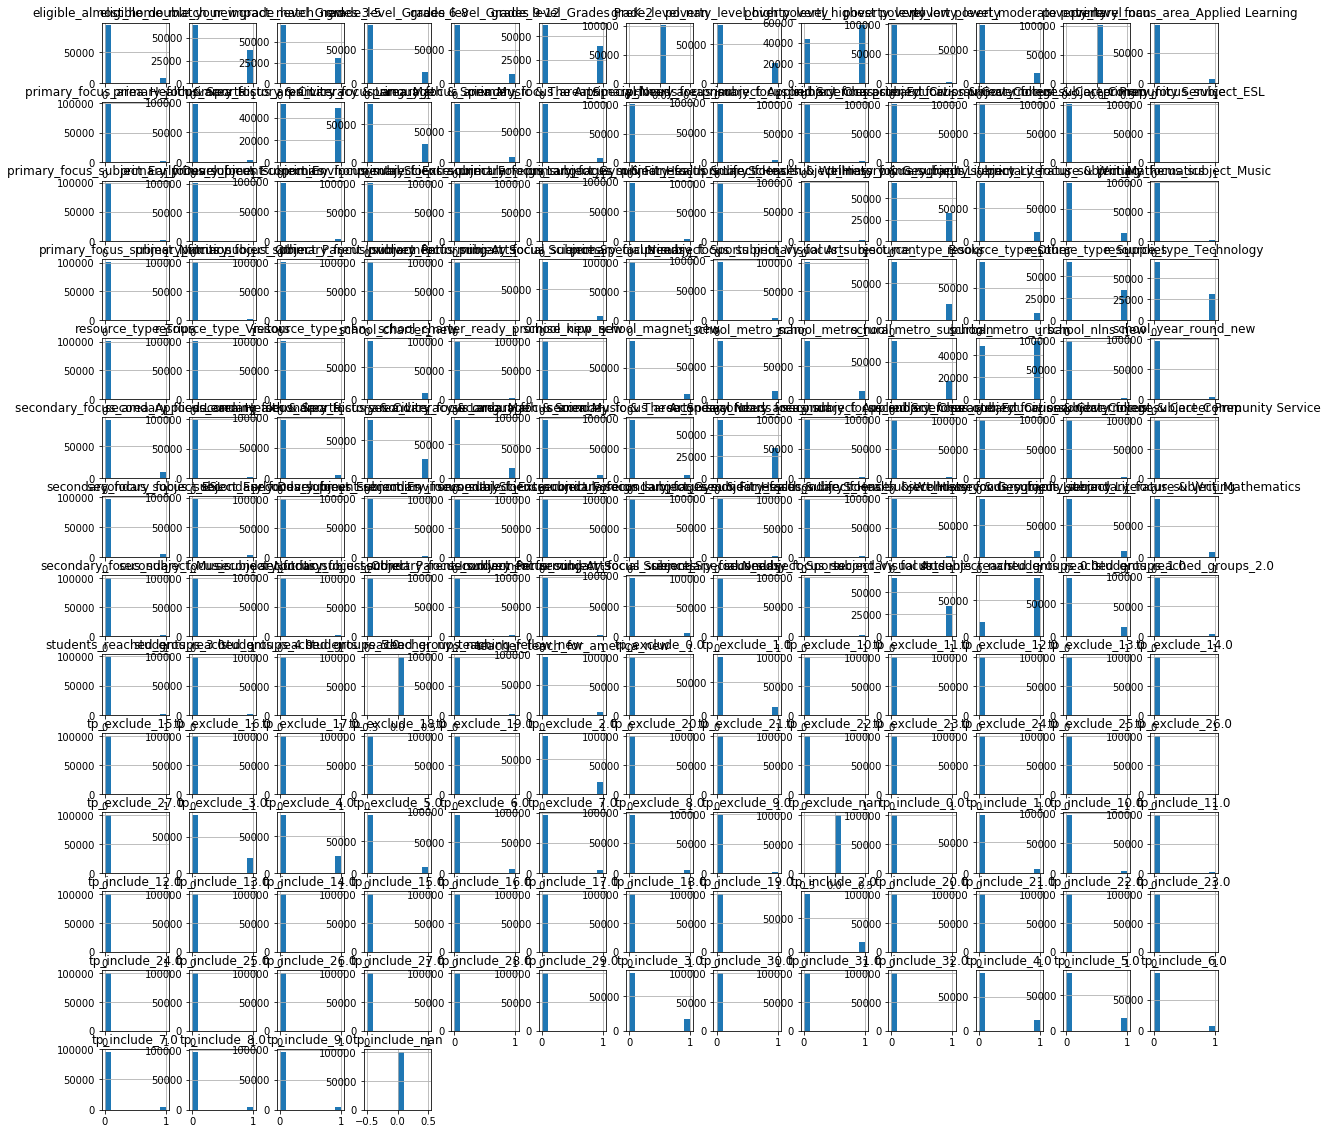

------ Analysis for Y Training Set ------

Summary stats for eligible_almost_home_match_new
count    50053.000000
mean         0.055881
std          0.229694
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: eligible_almost_home_match_new, dtype: float64


Summary stats for eligible_double_your_impact_match_new
count    50053.000000
mean         0.341358
std          0.474170
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: eligible_double_your_impact_match_new, dtype: float64


Summary stats for teacher_ny_teaching_fellow_new
count    50053.00000
mean         0.00931
std          0.09604
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: teacher_ny_teaching_fellow_new, dtype: float64


Summary stats for teacher_teach_for_america_new
count    50053.000000
mean         0.040837
std          0.1979

Name: tp_include_21.0, dtype: float64


Summary stats for tp_include_22.0
count    50053.000000
mean         0.000779
std          0.027903
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: tp_include_22.0, dtype: float64


Summary stats for tp_include_23.0
count    50053.000000
mean         0.000799
std          0.028258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: tp_include_23.0, dtype: float64


Summary stats for tp_include_24.0
count    50053.000000
mean         0.000619
std          0.024879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: tp_include_24.0, dtype: float64


Summary stats for tp_include_25.0
count    50053.000000
mean         0.000619
std          0.024879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000




Summary stats for primary_focus_subject_Early Development
count    50053.00000
mean         0.01882
std          0.13589
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: primary_focus_subject_Early Development, dtype: float64


Summary stats for primary_focus_subject_Economics
count    50053.000000
mean         0.003516
std          0.059194
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: primary_focus_subject_Economics, dtype: float64


Summary stats for primary_focus_subject_Environmental Science
count    50053.000000
mean         0.037900
std          0.190956
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: primary_focus_subject_Environmental Science, dtype: float64


Summary stats for primary_focus_subject_Extracurricular
count    50053.000000
mean         0.003576
std          0.05969

Summary stats for secondary_focus_subject_nan
count    50053.000000
mean         0.322238
std          0.467338
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: secondary_focus_subject_nan, dtype: float64


Summary stats for secondary_focus_area_Applied Learning
count    50053.000000
mean         0.097297
std          0.296365
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: secondary_focus_area_Applied Learning, dtype: float64


Summary stats for secondary_focus_area_Health & Sports
count    50053.000000
mean         0.023056
std          0.150081
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: secondary_focus_area_Health & Sports, dtype: float64


Summary stats for secondary_focus_area_History & Civics
count    50053.000000
mean         0.060636
std          0.238663
min          0.000

Length: 173, dtype: bool

Histograms of all columns


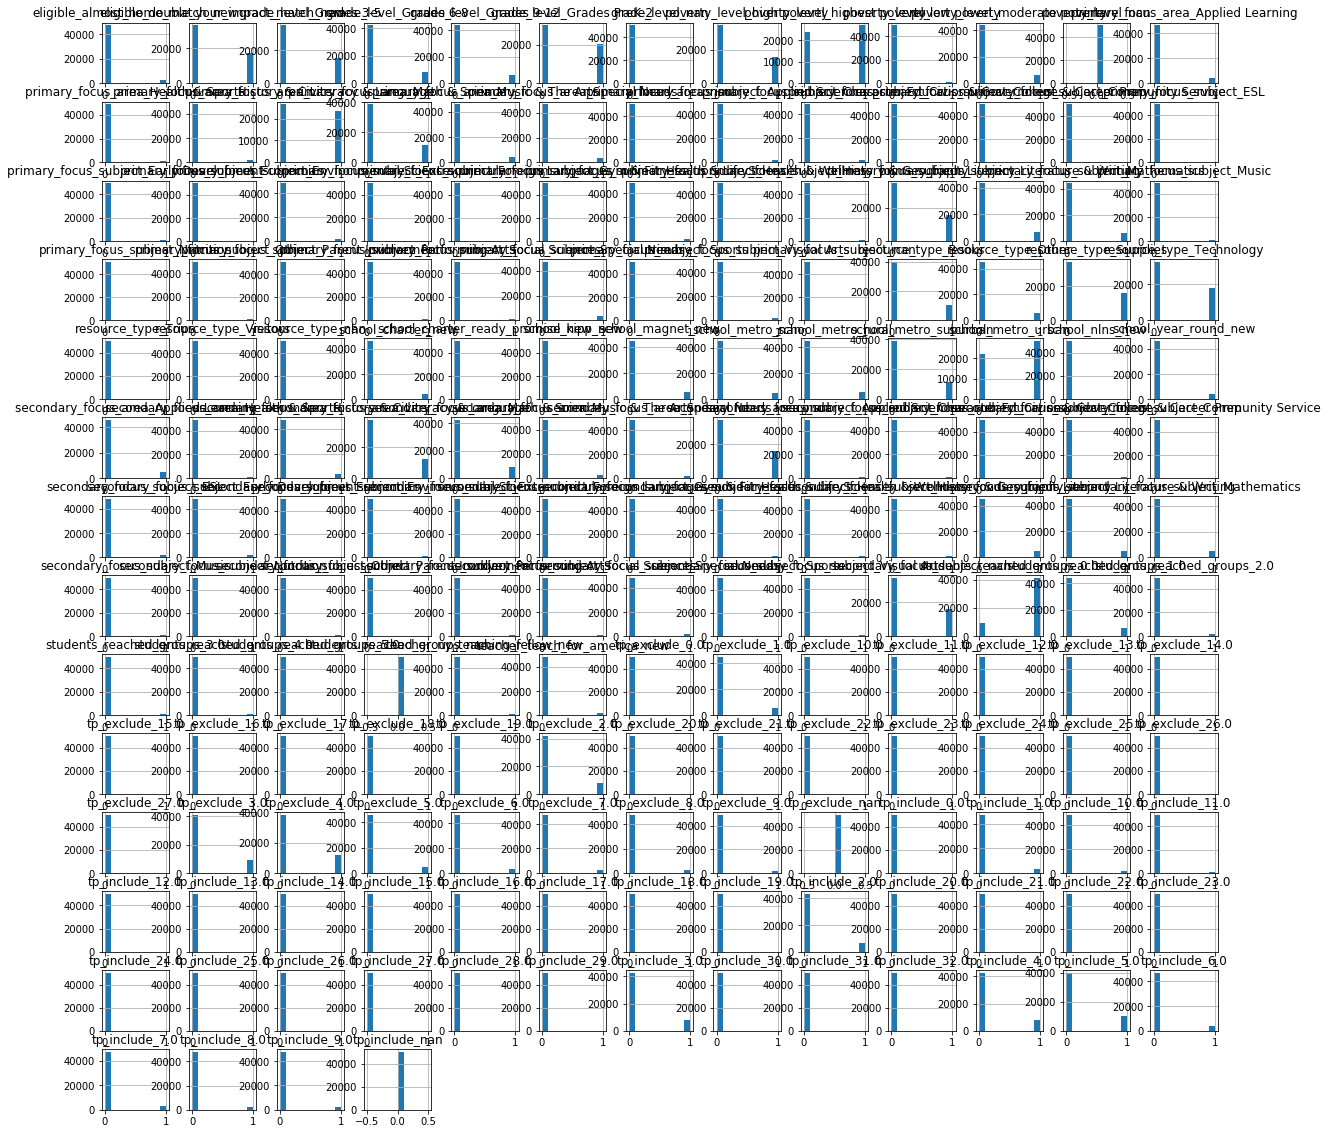

In [24]:
de.analyze_split_data(train_test_one[0], train_test_one[2])

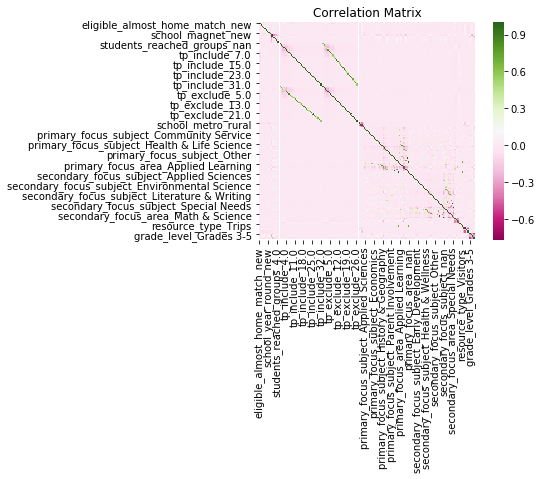

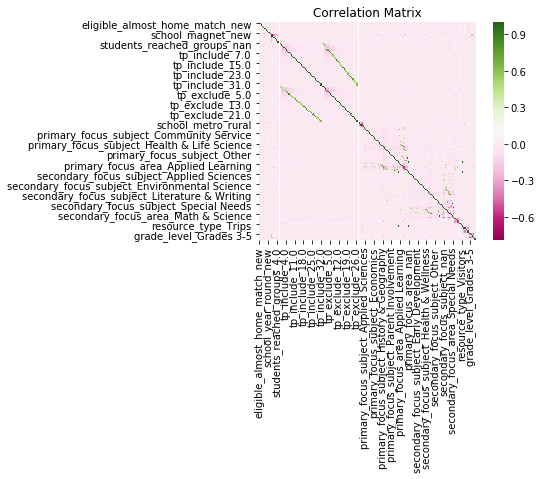

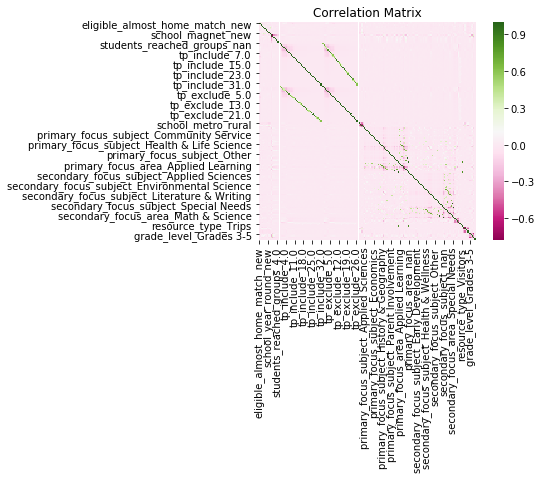

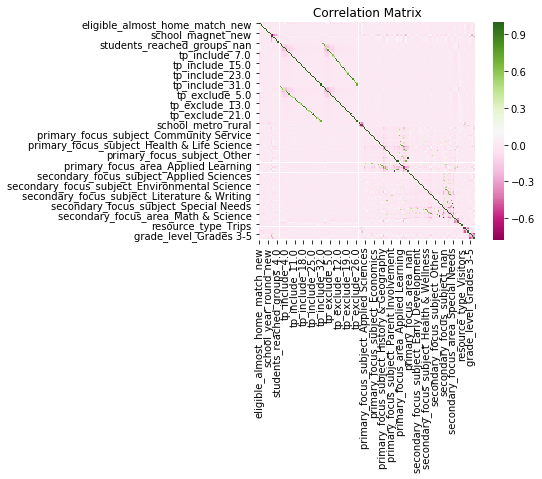

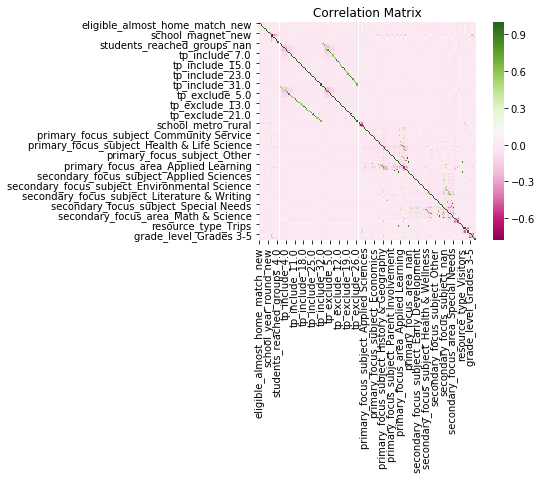

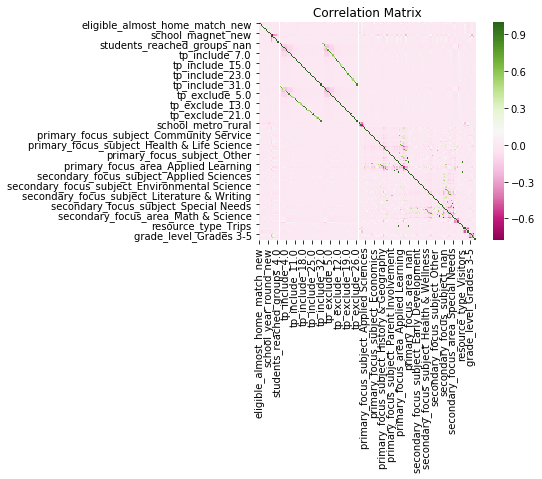

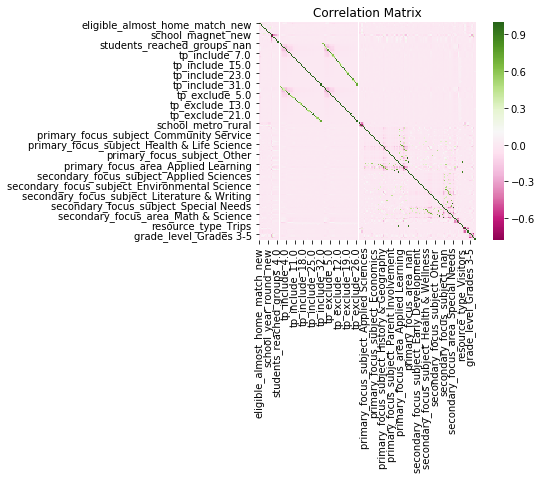

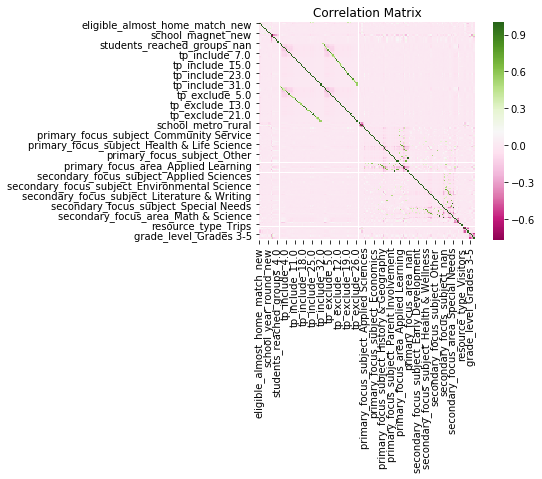

In [25]:
for t in train_test_lists:
    de.explore_potential_correlations(t[0])
    de.explore_potential_correlations(t[2])

In [26]:
for tr in train_test_lists:
    de.nulls(tr[0])
    de.nulls(tr[2])

Values with True have nulls
eligible_almost_home_match_new              False
eligible_double_your_impact_match_new       False
teacher_ny_teaching_fellow_new              False
teacher_teach_for_america_new               False
school_charter_ready_promise_new            False
school_kipp_new                             False
school_nlns_new                             False
school_year_round_new                       False
school_magnet_new                           False
school_charter_new                          False
students_reached_groups_0.0                 False
students_reached_groups_1.0                 False
students_reached_groups_2.0                 False
students_reached_groups_3.0                 False
students_reached_groups_4.0                 False
students_reached_groups_5.0                 False
students_reached_groups_nan                 False
tp_include_0.0                              False
tp_include_1.0                              False
tp_include_2.0        

eligible_almost_home_match_new              False
eligible_double_your_impact_match_new       False
teacher_ny_teaching_fellow_new              False
teacher_teach_for_america_new               False
school_charter_ready_promise_new            False
school_kipp_new                             False
school_nlns_new                             False
school_year_round_new                       False
school_magnet_new                           False
school_charter_new                          False
students_reached_groups_0.0                 False
students_reached_groups_1.0                 False
students_reached_groups_2.0                 False
students_reached_groups_3.0                 False
students_reached_groups_4.0                 False
students_reached_groups_5.0                 False
students_reached_groups_nan                 False
tp_include_0.0                              False
tp_include_1.0                              False
tp_include_2.0                              False


eligible_almost_home_match_new              False
eligible_double_your_impact_match_new       False
teacher_ny_teaching_fellow_new              False
teacher_teach_for_america_new               False
school_charter_ready_promise_new            False
school_kipp_new                             False
school_nlns_new                             False
school_year_round_new                       False
school_magnet_new                           False
school_charter_new                          False
students_reached_groups_0.0                 False
students_reached_groups_1.0                 False
students_reached_groups_2.0                 False
students_reached_groups_3.0                 False
students_reached_groups_4.0                 False
students_reached_groups_5.0                 False
students_reached_groups_nan                 False
tp_include_0.0                              False
tp_include_1.0                              False
tp_include_2.0                              False


Several issues here:
- Need to impute some nulls, I'll impute students_reached with the median.
- Some variables to delete: school ncesid, school lat, school long, school city, school state, school district, school county. These are all locations that are hard to dummify, so I'll rely on zip code and metro status to provide me locations
- Hard to tell correlations between variables. If there's time, I'll dive down and look at specific correlations that I suspect.

# 3) Let's Answer Some Questions

How many projects are funded in our largest training set?

Are most projects funded in metro, rural, or other areas?

Which economic group are most projects targeting?

Are certain subjects preferred over others?

# 4) Machine Learning  

In [56]:
ser1 = train_test_one[1].T.squeeze()
ser1s = ser1.reshape(-1, 1)


/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [57]:
ser2 = train_test_one[3].T.squeeze()
ser2s = ser2.reshape(-1, 1)

/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [72]:
models_to_run = ['RF','DT', 'KNN', 'ET', 'AB', 'GB', 'LR', 'NB']
ap.go(train_test_one[0][:100], train_test_one[2][:100], ser1s[:100], ser2s[:100], 'test', models_to_run)

RF
(0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.71428571428571

(0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.79381443298969068, 0.7938144329

,model_type,clf,parameters,auc-roc,p_at_5,p_at_10,p_at_20
